# Cephalometric analysis yolov9
---


## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Tue Apr 16 11:57:34 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.161.07             Driver Version: 535.161.07   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3050 ...    Off | 00000000:01:00.0 Off |                  N/A |
| N/A   54C    P8               6W /  60W |      8MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [16]:
%cd ..

/home/selvatharrun/Desktop/testthala


**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/home/selvatharrun/Desktop/testthala


## Clone and Install

**NOTE:** YOLOv9 is very new. At the moment, we recommend using a fork of the main repository. The `detect.py` script contains a bug that prevents inference. This bug is patched in the fork.

In [18]:

%cd yolov9
!pip install -r requirements.txt -q --break-system-packages --use-deprecated=legacy-resolver

**NOTE:** Let's install the [`roboflow`](https://pypi.org/project/roboflow) package, which we will use to download our dataset from [Roboflow Universe](https://universe.roboflow.com/).

In [20]:
!pip install -q roboflow --break-system-packages --use-deprecated=legacy-resolver

## Download model weights

**NOTE:** In the YOLOv9 paper, versions `yolov9-s` and `yolov9-m` are also mentioned, but the weights for these models are not yet available in the YOLOv9 [repository](https://github.com/WongKinYiu/yolov9).

In [18]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

^C


In [31]:
!ls -la {HOME}/weights

total 402448
drwxrwxr-x 2 selvatharrun selvatharrun      4096 Apr 15 18:30 .
drwxrwxr-x 4 selvatharrun selvatharrun      4096 Apr 15 18:24 ..
-rw-rw-r-- 1 selvatharrun selvatharrun  51508261 Feb 18 18:06 gelan-c.pt
-rw-rw-r-- 1 selvatharrun selvatharrun 117203713 Feb 18 18:06 gelan-e.pt
-rw-rw-r-- 1 selvatharrun selvatharrun 103153312 Feb 18 18:06 yolov9-c.pt
-rw-rw-r-- 1 selvatharrun selvatharrun 140217688 Feb 18 18:06 yolov9-e.pt


**NOTE:** The dataset must be saved inside the `{HOME}/yolov9` directory, otherwise, the training will not succeed.

In [6]:
%cd {HOME}/yolov9

/home/selvatharrun/Desktop/testthala/yolov9


**NOTE:** In this tutorial, I will use the [football-players-detection](https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc) dataset. Feel free to replace it with your dataset in YOLO format or use another dataset available on [Roboflow Universe](https://universe.roboflow.com). Additionally, if you plan to deploy your model to Roboflow after training, make sure you are the owner of the dataset and that no model is associated with the version of the dataset you are going to training on.

In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="ZOPETSNpOENTPTAZXRyk")
project = rf.workspace("ueh-tb3hq").project("facial-landmark-125ft")
version = project.version(9)
dataset = version.download("yolov9")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Facial-Landmark-9 in yolov9:: 100%|██████████| 2012/2012 [00:00<00:00, 15620.32it/s]


## Train Custom Model

In [34]:
%cd {HOME}/yolov9

!python3 train.py \
--batch 16 --epochs 25 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml


/home/selvatharrun/Desktop/testthala/yolov9
2024-04-15 18:49:11.213319: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-15 18:49:11.232808: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-15 18:49:11.339662: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-15 18:49:11.339721: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-15 18:49:11.359207: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unab

## Examine Training Results

**NOTE:** By default, the results of each subsequent training sessions are saved in `{HOME}/yolov9/runs/train/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

In [3]:
!ls {HOME}/yolov9/runs/train/exp/

confusion_matrix.png				    results.png
events.out.tfevents.1712737951.d2d7b1c4e8fe.4406.0  train_batch0.jpg
F1_curve.png					    train_batch1.jpg
hyp.yaml					    train_batch2.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
opt.yaml					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights


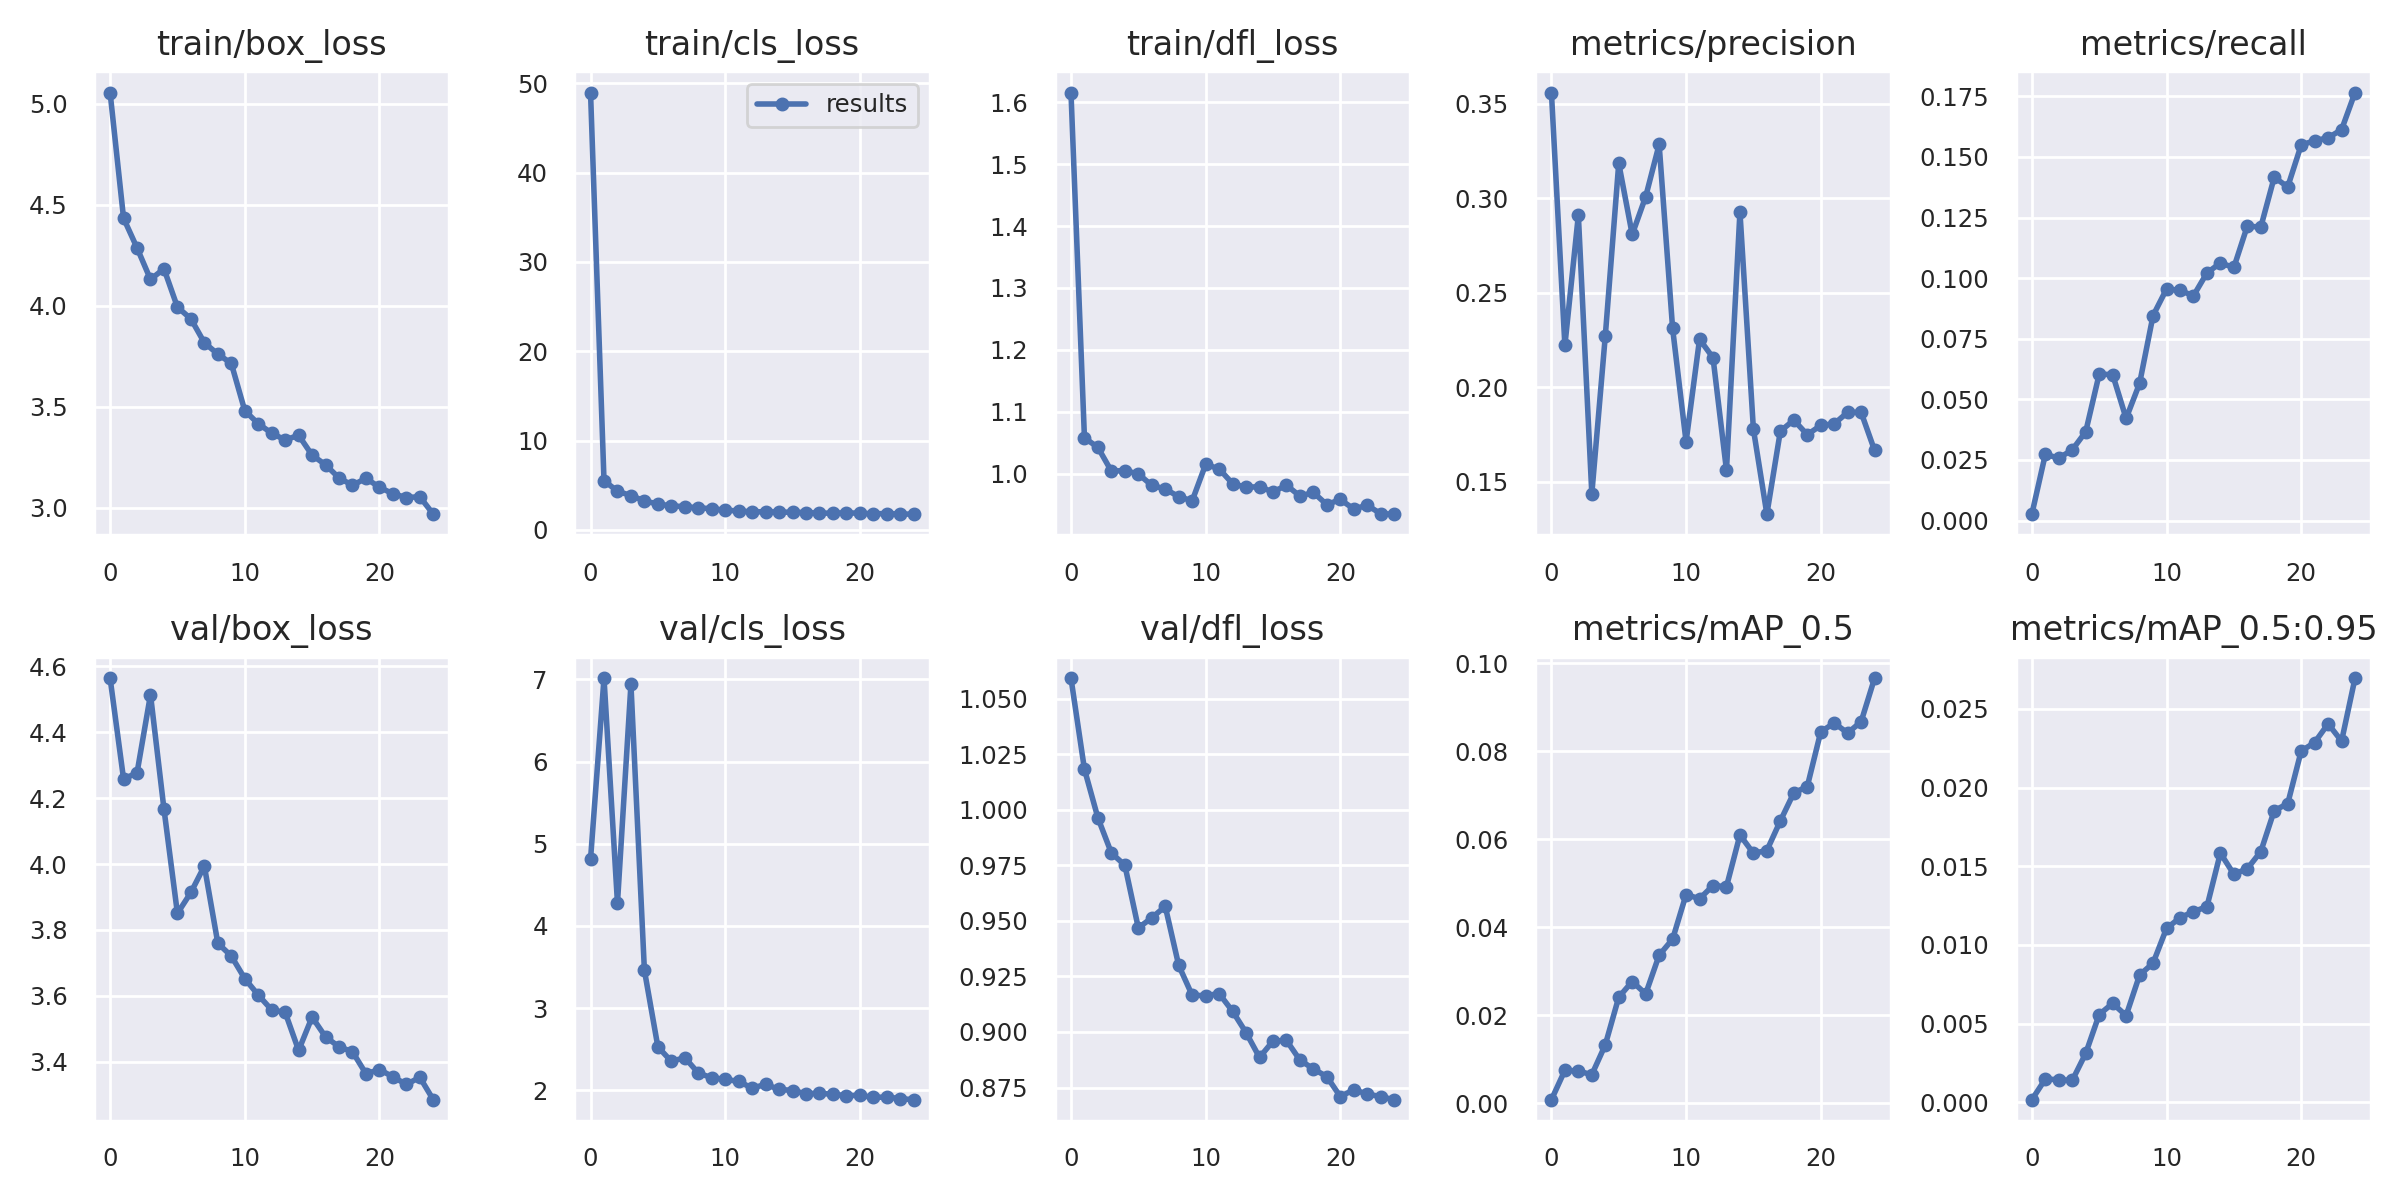

In [23]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

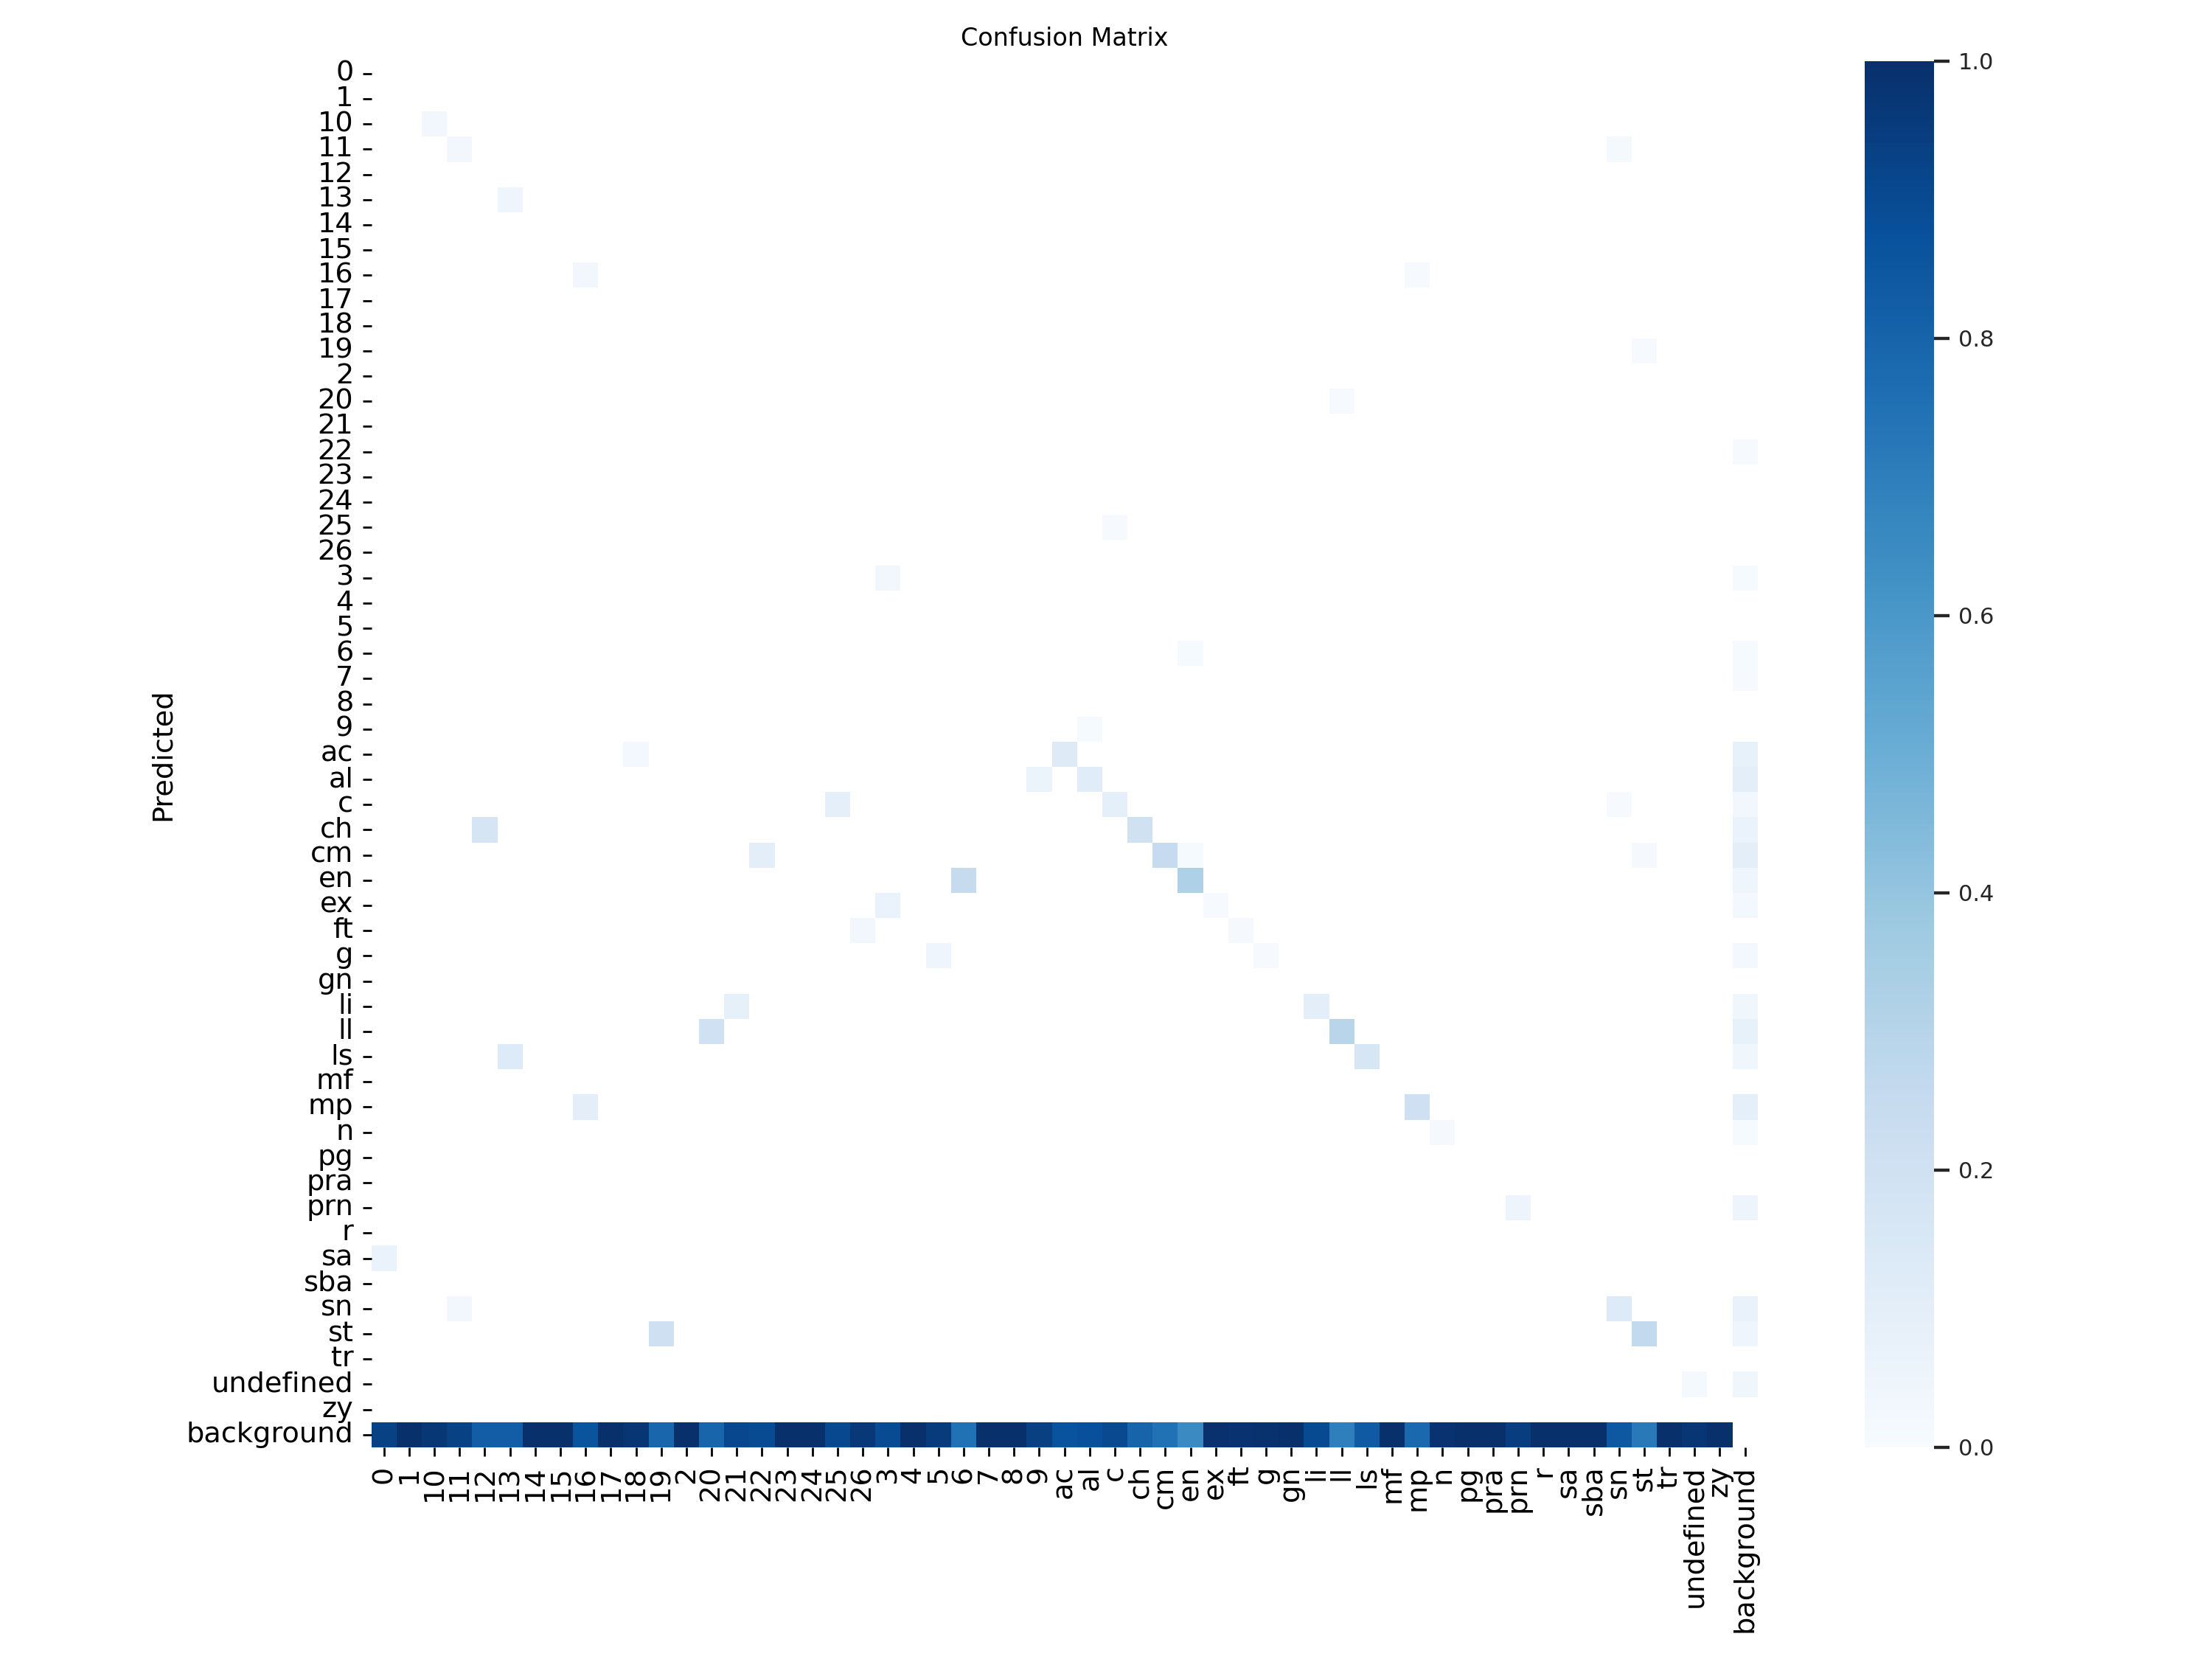

In [24]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

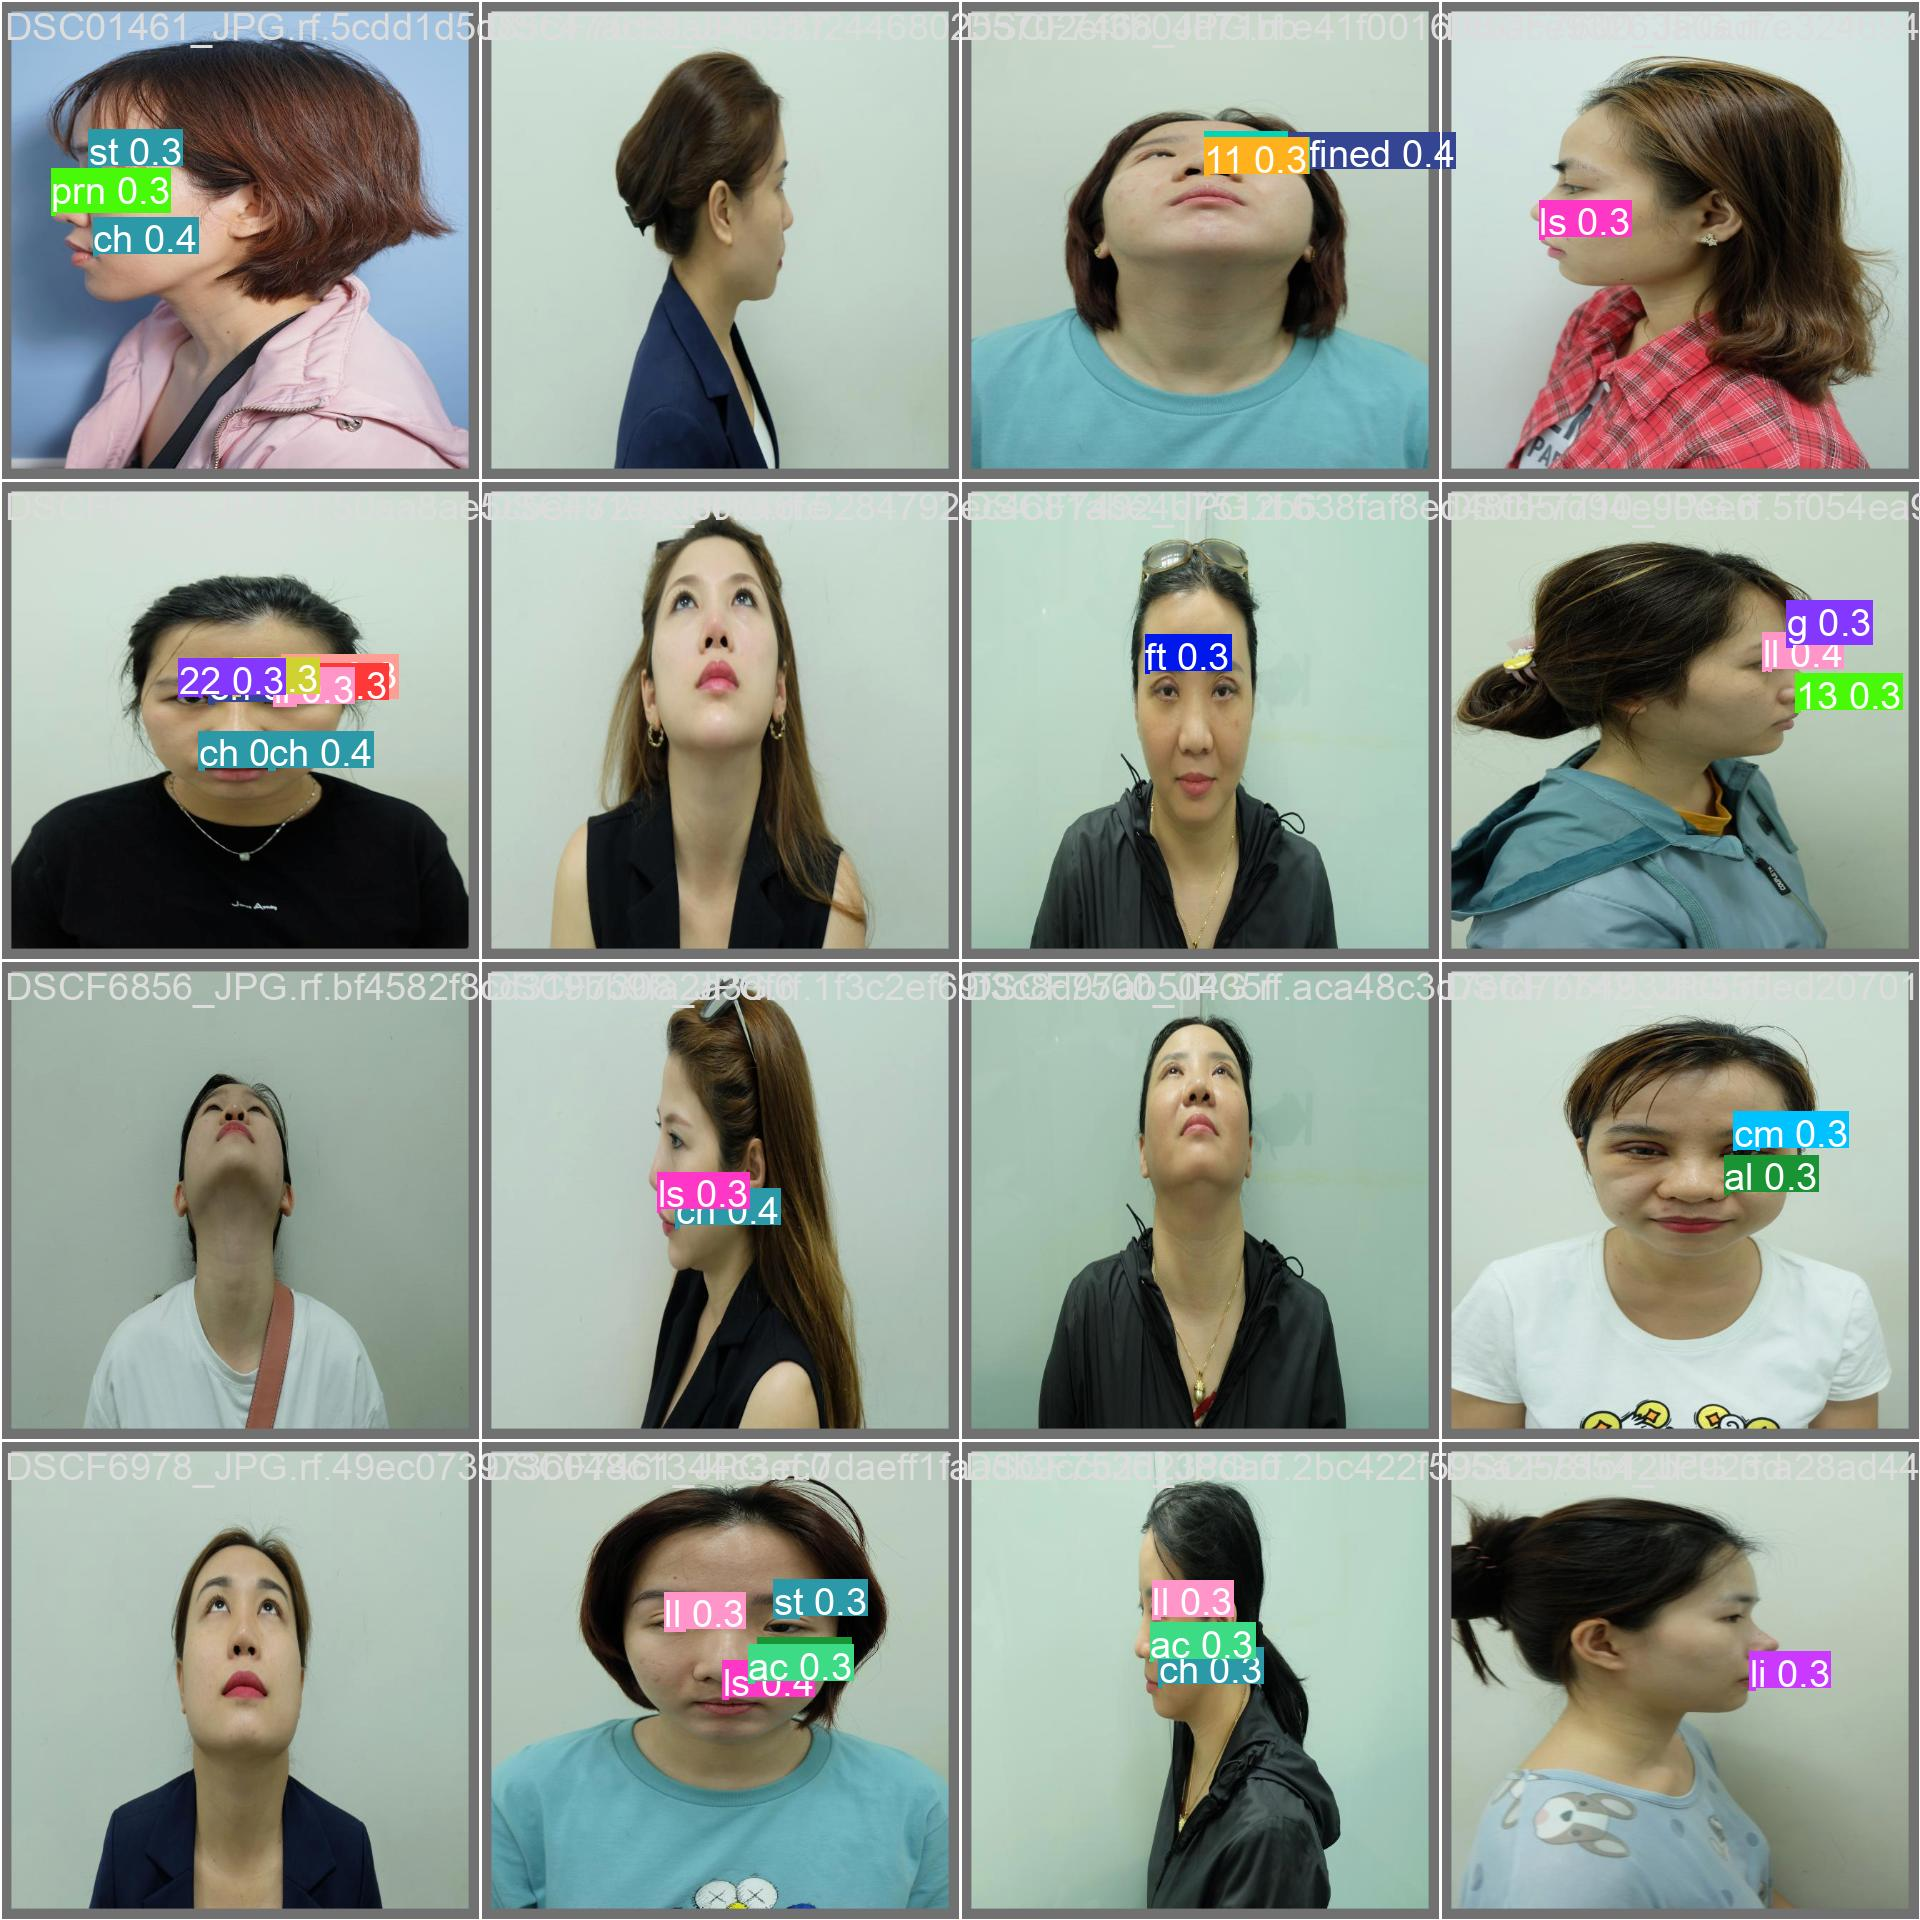

In [26]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch0_pred.jpg", width=1000)

## Validate Custom Model

In [8]:
%cd {HOME}/yolov9

!python3 val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device cpu \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt

/home/selvatharrun/Desktop/testthala/yolov9
val: data=/home/selvatharrun/Desktop/testthala/yolov9/Facial-Landmark-9/data.yaml, weights=['/home/selvatharrun/Desktop/testthala/yolov9/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=cpu, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 079c98a Python-3.11.6 torch-2.0.1+cu117 CPU

Fusing layers... 
gelan-c summary: 467 layers, 25452594 parameters, 0 gradients, 102.7 GFLOPs
val: Scanning /home/selvatharrun/Desktop/testthala/yolov9/Facial-Landmark-9/vali
val: New cache created: /home/selvatharrun/Desktop/testthala/yolov9/Facial-Landmark-9/valid/labels.cache
                 Class     Images  Instances          P          R      mAP50   Exception in thread Thread-6 (plot_images):
Traceback (most recent cal

## Inference with Custom Model

In [5]:
%cd {HOME}/yolov9
!python3 detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt \
--source {dataset.location}/test/images \
--hide-conf



/home/selvatharrun/Desktop/testthala/yolov9
detect: weights=['/home/selvatharrun/Desktop/testthala/yolov9/runs/train/exp/weights/best.pt'], source=/home/selvatharrun/Desktop/testthala/Facial-Landmark-9/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=True, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 079c98a Python-3.11.6 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 3902MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25452594 parameters, 0 gradients, 102.7 GFLOPs
image 1/100 /home/selvatharrun/Desktop/testthala/Facial-Landmark-9/test/images/DSC07652_JPG.rf.f76fbaa02e334603f46763d465622acf.jpg: 1280x1280 1 ac, 2 als, 2 cs, 2 chs, 2 cms, 2 exs, 4 gs, 

**NOTE:** Just like behore, the inference results have been saved in the appropriate directory inside `{HOME}/yolov9/runs/detect/`. Let's examine few of those results.

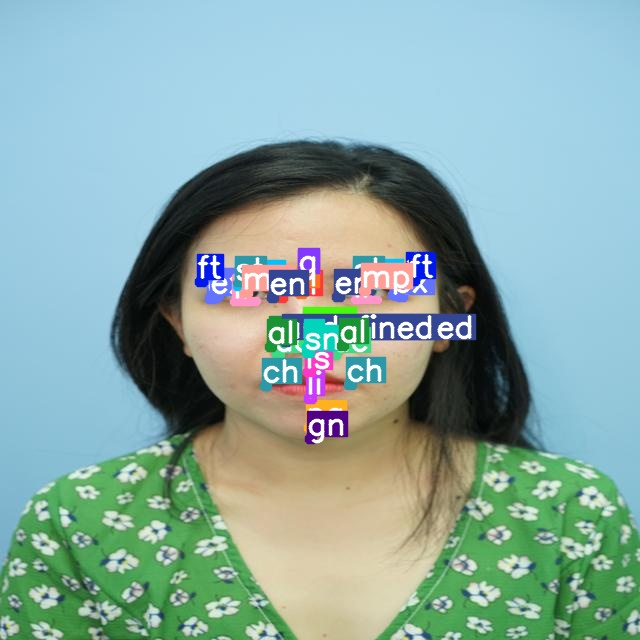

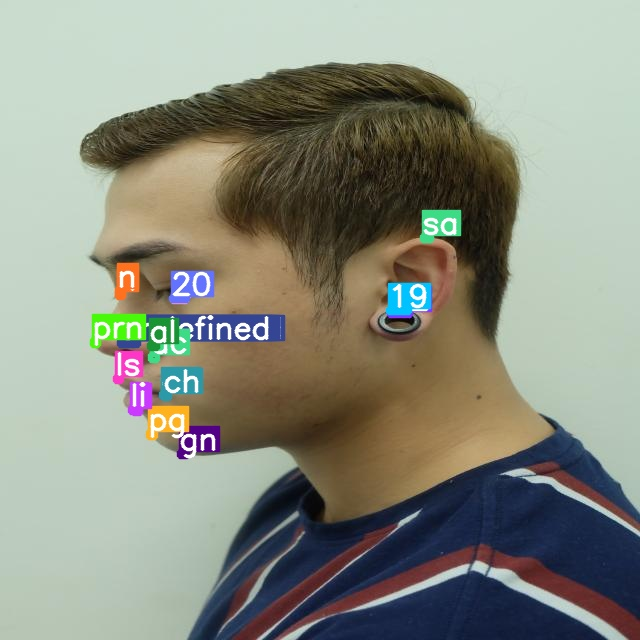

In [9]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp12/*.jpg')[:2]:
      display(Image(filename=image_path, width=600))